In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


races = pd.read_csv("races.csv")
drivers = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")
results = pd.read_csv("results.csv")
qualifying = pd.read_csv("qualifying.csv")
circuits = pd.read_csv("circuits.csv")
driver_standings = pd.read_csv("driver_standings.csv")
status = pd.read_csv("status.csv")
pit_stops = pd.read_csv("pit_stops.csv")

In [2]:
print(races.isnull().sum())
print(drivers.isnull().sum())
print(constructors.isnull().sum())

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64
driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64


In [3]:
races["date"] = pd.to_datetime(races["date"])

races.sort_values("date",ascending=False, inplace=True)

races["days_since_last_race"] = races["date"].diff().dt.days        

print(races)

      raceId  year  round  circuitId                    name       date  \
1124    1144  2024     24         24    Abu Dhabi Grand Prix 2024-12-08   
1123    1143  2024     23         78        Qatar Grand Prix 2024-12-01   
1122    1142  2024     22         80    Las Vegas Grand Prix 2024-11-23   
1121    1141  2024     21         18    São Paulo Grand Prix 2024-11-03   
1120    1140  2024     20         32  Mexico City Grand Prix 2024-10-27   
...      ...   ...    ...        ...                     ...        ...   
836      837  1950      5         13      Belgian Grand Prix 1950-06-18   
835      836  1950      4         66        Swiss Grand Prix 1950-06-04   
834      835  1950      3         19        Indianapolis 500 1950-05-30   
833      834  1950      2          6       Monaco Grand Prix 1950-05-21   
832      833  1950      1          9      British Grand Prix 1950-05-13   

          time                                                url    fp1_date  \
1124  13:00:00  ht

In [4]:
driver_wins = results.groupby("driverId")["positionOrder"].apply(lambda x: (x == 1).sum()).reset_index()
driver_wins.columns = ["driverId", "wins"]
top_drivers = driver_wins.sort_values(by="wins", ascending=False).head(10)

top_drivers = top_drivers.merge(drivers, on="driverId")
print(top_drivers[["surname", "wins"]])

      surname  wins
0    Hamilton   105
1  Schumacher    91
2  Verstappen    63
3      Vettel    53
4       Prost    51
5       Senna    41
6      Alonso    32
7     Mansell    31
8     Stewart    27
9       Lauda    25


In [5]:
top_drivers = top_drivers.merge(results[["driverId", "constructorId"]].drop_duplicates(), on="driverId")
top_drivers = top_drivers.merge(constructors, on="constructorId")

print(top_drivers[["surname", "wins", "name"]])  


       surname  wins                name
0     Hamilton   105             McLaren
1     Hamilton   105            Mercedes
2   Schumacher    91             Ferrari
3   Schumacher    91            Benetton
4   Schumacher    91              Jordan
5   Schumacher    91            Mercedes
6   Verstappen    63          Toro Rosso
7   Verstappen    63            Red Bull
8       Vettel    53          Toro Rosso
9       Vettel    53          BMW Sauber
10      Vettel    53            Red Bull
11      Vettel    53             Ferrari
12      Vettel    53        Aston Martin
13       Prost    51            Williams
14       Prost    51             Ferrari
15       Prost    51             McLaren
16       Prost    51             Renault
17       Senna    41            Williams
18       Senna    41             McLaren
19       Senna    41          Team Lotus
20       Senna    41             Toleman
21      Alonso    32             Renault
22      Alonso    32             McLaren
23      Alonso  

In [6]:
results["year"] = results["raceId"].map(races.set_index("raceId")["date"].dt.year)

season_winners = results.groupby(["year", "driverId"])["positionOrder"].apply(lambda x: (x == 1).sum()).reset_index()
season_winners.columns = ["year", "driverId", "wins"]
top_per_season = season_winners.sort_values(["year", "wins"], ascending=[True, False]).groupby("year").first().reset_index()

top_per_season = top_per_season.merge(drivers, on="driverId")

print(top_per_season[["year", "surname", "wins"]].tail(10))  

    year     surname  wins
65  2015    Hamilton    10
66  2016    Hamilton    10
67  2017    Hamilton     9
68  2018    Hamilton    11
69  2019    Hamilton    11
70  2020    Hamilton    11
71  2021  Verstappen    10
72  2022  Verstappen    15
73  2023  Verstappen    19
74  2024  Verstappen     9


In [7]:
constructor_wins = results.groupby("constructorId")["positionOrder"].apply(lambda x: (x == 1).sum()).reset_index()
constructor_wins.columns = ["constructorId", "wins"]
top_teams = constructor_wins.sort_values(by="wins", ascending=False).head(10)

top_teams = top_teams.merge(constructors, on="constructorId")
print(top_teams[["name", "wins"]])

         name  wins
0     Ferrari   249
1     McLaren   185
2    Mercedes   129
3    Red Bull   122
4    Williams   114
5  Team Lotus    45
6     Renault    35
7    Benetton    27
8     Brabham    23
9     Tyrrell    23


In [8]:
results["year"] = results["raceId"].map(races.set_index("raceId")["date"].dt.year)
constructor_wins_by_year = results[results["positionOrder"] == 1].groupby(["year", "constructorId"]).size().reset_index(name="wins")

constructor_wins_by_year = constructor_wins_by_year.merge(constructors, on="constructorId")
print(constructor_wins_by_year[["year", "name", "wins"]].tail(10))

     year            name  wins
267  2021  Alpine F1 Team     1
268  2022         Ferrari     4
269  2022        Red Bull    17
270  2022        Mercedes     1
271  2023         Ferrari     1
272  2023        Red Bull    21
273  2024         McLaren     6
274  2024         Ferrari     5
275  2024        Red Bull     9
276  2024        Mercedes     4


In [9]:
one_two_finishes = results.groupby(["raceId", "constructorId"])["positionOrder"].apply(lambda x: set(x) == {1, 2}).reset_index()
one_two_finishes = one_two_finishes[one_two_finishes["positionOrder"] == True]

one_two_count = one_two_finishes["constructorId"].value_counts().reset_index()
one_two_count.columns = ["constructorId", "one_two_finishes"]

one_two_count = one_two_count.merge(constructors, on="constructorId")[["name", "one_two_finishes"]]

print(one_two_count.head(10))


            name  one_two_finishes
0        Ferrari                62
1       Mercedes                55
2        McLaren                48
3       Williams                31
4       Red Bull                31
5        Tyrrell                 7
6          Brawn                 4
7  Brabham-Repco                 3
8       Benetton                 2
9        Renault                 2


In [10]:
constructor_wins_per_season = results.groupby(["year", "constructorId"])["positionOrder"].apply(lambda x: (x == 1).sum()).reset_index()
constructor_wins_per_season.columns = ["year", "constructorId", "wins"]

constructor_wins_per_season = constructor_wins_per_season.merge(constructors, on="constructorId")[["year", "name", "wins"]]
print(constructor_wins_per_season.sort_values(["year", "wins"], ascending=[True, False]).tail(10))

      year            name  wins
1104  2024        Red Bull     9
1101  2024         McLaren     6
1103  2024         Ferrari     5
1107  2024        Mercedes     4
1102  2024        Williams     0
1105  2024          Sauber     0
1106  2024    Aston Martin     0
1108  2024    Haas F1 Team     0
1109  2024  Alpine F1 Team     0
1110  2024      RB F1 Team     0


In [11]:
podiums = results[results["positionOrder"].isin([1, 2, 3])].groupby("driverId").size().reset_index(name="podiums")
podiums = podiums.merge(drivers, on="driverId")[["surname", "podiums"]]

print(podiums.sort_values("podiums", ascending=False).head(10))

         surname  podiums
0       Hamilton      202
20    Schumacher      155
15        Vettel      122
206   Verstappen      112
3         Alonso      106
47         Prost      106
5      Räikkönen      103
42         Senna       80
17   Barrichello       68
203       Bottas       67


In [12]:
pole_positions = qualifying[qualifying["position"] == 1].groupby("driverId").size().reset_index(name="pole_positions")
pole_positions = pole_positions.merge(drivers, on="driverId")[["surname", "pole_positions"]]

print(pole_positions.sort_values("pole_positions", ascending=False).head(10))

       surname  pole_positions
0     Hamilton             107
12      Vettel              57
31  Verstappen              43
16  Schumacher              36
2      Rosberg              30
3       Alonso              23
34     Leclerc              23
5    Räikkönen              19
29      Bottas              19
7        Massa              16


In [13]:
circuit_race_count = races["circuitId"].value_counts().reset_index()
circuit_race_count.columns = ["circuitId", "num_races"]

circuit_race_count = circuit_race_count.merge(circuits, on="circuitId")[["name", "location", "num_races"]]

print(circuit_race_count.sort_values("num_races", ascending=False).head(10))

                           name     location  num_races
0  Autodromo Nazionale di Monza        Monza         74
1             Circuit de Monaco  Monte-Carlo         70
2           Silverstone Circuit  Silverstone         59
3  Circuit de Spa-Francorchamps          Spa         57
4     Circuit Gilles Villeneuve     Montreal         43
5    Autódromo José Carlos Pace    São Paulo         41
6                   Nürburgring      Nürburg         41
7                   Hungaroring     Budapest         39
8                 Red Bull Ring    Spielberg         38
9                Hockenheimring   Hockenheim         37


In [14]:
race_outcomes = results["statusId"].value_counts().reset_index()
race_outcomes.columns = ["statusId", "count"]

race_outcomes = race_outcomes.merge(status, on="statusId")[["status", "count"]]

print(race_outcomes.head(10))


            status  count
0         Finished   7674
1           +1 Lap   4037
2           Engine   2026
3          +2 Laps   1613
4         Accident   1062
5  Did not qualify   1025
6        Collision    854
7          Gearbox    810
8         Spun off    795
9          +3 Laps    731


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/214979538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="wins", x="surname", data=top_drivers, palette="pastel")


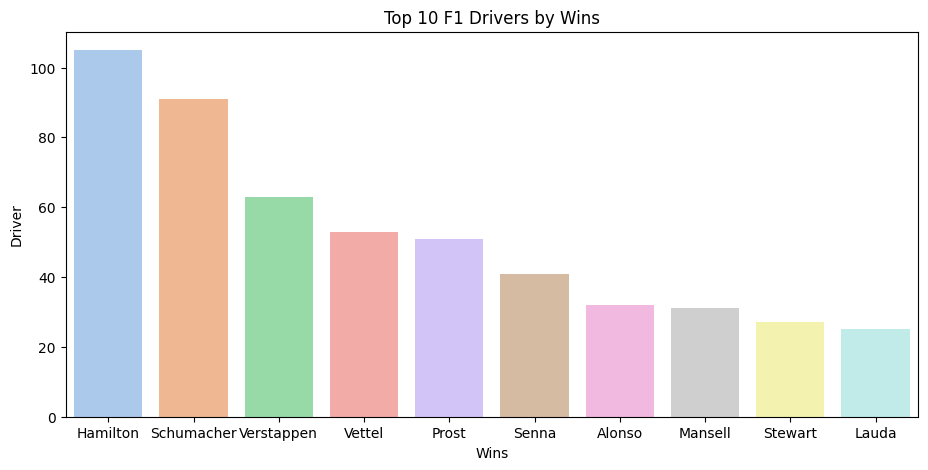

In [15]:
plt.figure(figsize=(11, 5))
sns.barplot(y="wins", x="surname", data=top_drivers, palette="pastel")
plt.xlabel("Wins")
plt.ylabel("Driver")
plt.title("Top 10 F1 Drivers by Wins")
plt.show()


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/3807772511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="wins", y="name", data=top_teams, palette="viridis")


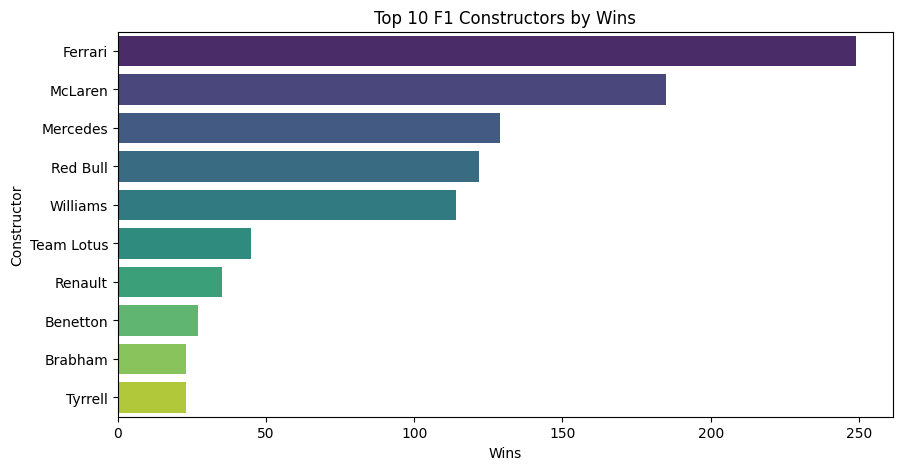

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x="wins", y="name", data=top_teams, palette="viridis")
plt.xlabel("Wins")
plt.ylabel("Constructor")
plt.title("Top 10 F1 Constructors by Wins")
plt.show()


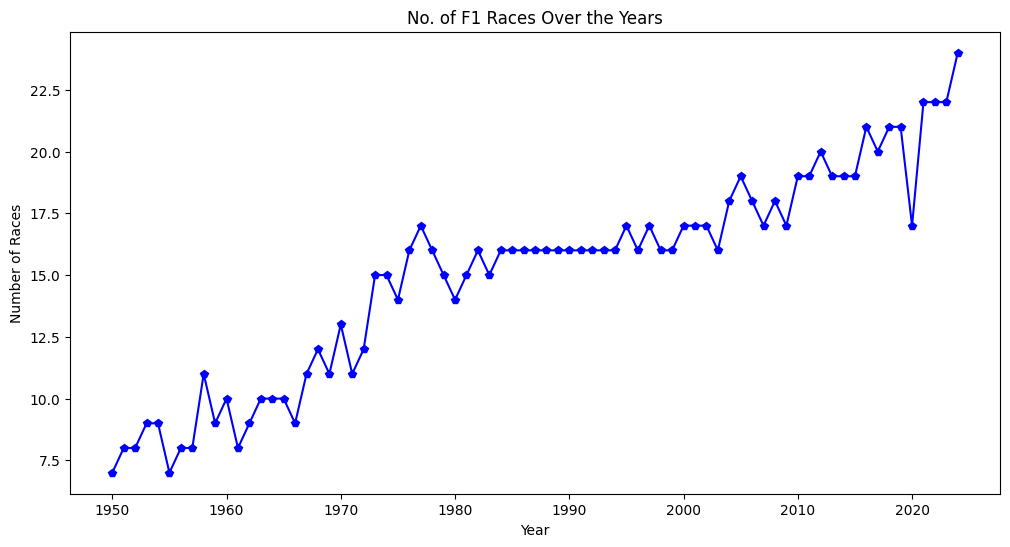

In [17]:
races["date"] = pd.to_datetime(races["date"])  # Convert to datetime
race_counts = races.groupby(races["date"].dt.year).size()

plt.figure(figsize=(12, 6))
plt.plot(race_counts.index, race_counts.values, marker="p", linestyle="-", color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.title("No. of F1 Races Over the Years")
plt.show()


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/4106074299.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=circuit_counts["num_races"], y=circuit_counts["location"], palette="magma")


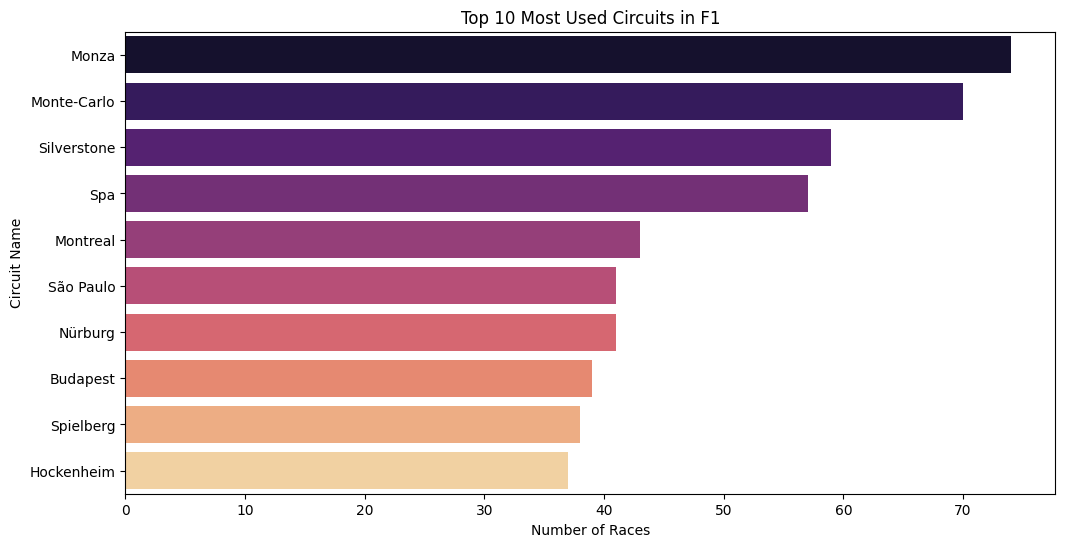

In [18]:
circuit_counts = races["circuitId"].value_counts().head(10).reset_index()
circuit_counts.columns = ["circuitId", "num_races"]

circuit_counts = circuit_counts.merge(circuits[["circuitId", "location"]], on="circuitId")

plt.figure(figsize=(12,6))
sns.barplot(x=circuit_counts["num_races"], y=circuit_counts["location"], palette="magma")
plt.xlabel("Number of Races")
plt.ylabel("Circuit Name")
plt.title("Top 10 Most Used Circuits in F1")
plt.show()


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/1553189673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drivers, x="wins", y="surname", palette="viridis")


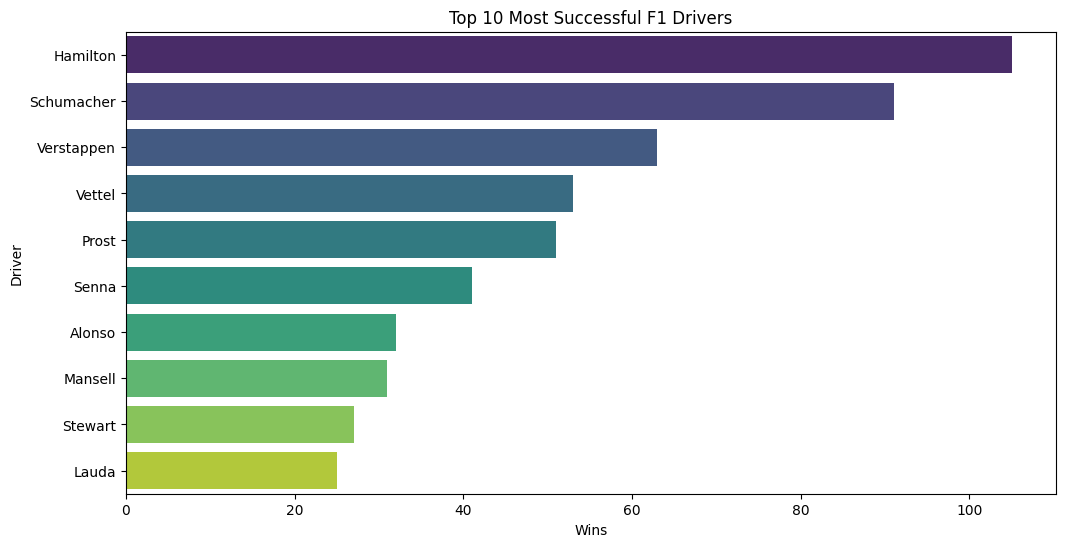

In [19]:
driver_wins = results.groupby("driverId")["positionOrder"].apply(lambda x: (x == 1).sum()).reset_index()
driver_wins.columns = ["driverId", "wins"]
driver_wins = driver_wins.merge(drivers, on="driverId")
top_drivers = driver_wins.sort_values("wins", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_drivers, x="wins", y="surname", palette="viridis")
plt.xlabel("Wins")
plt.ylabel("Driver")
plt.title("Top 10 Most Successful F1 Drivers")
plt.show()


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/893557762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x="wins", y="name", palette="plasma")


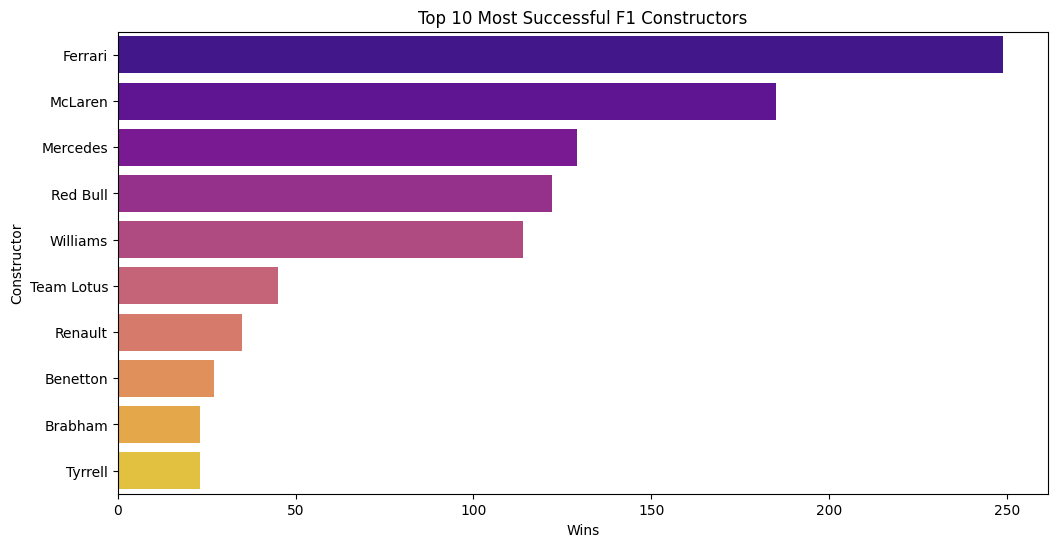

In [20]:
constructor_wins = results.groupby("constructorId")["positionOrder"].apply(lambda x: (x == 1).sum()).reset_index()
constructor_wins.columns = ["constructorId", "wins"]
top_teams = constructor_wins.sort_values(by="wins", ascending=False).head(10)
top_teams = top_teams.merge(constructors, on="constructorId")

plt.figure(figsize=(12,6))
sns.barplot(data=top_teams, x="wins", y="name", palette="plasma")
plt.xlabel("Wins")
plt.ylabel("Constructor")
plt.title("Top 10 Most Successful F1 Constructors")
plt.show()


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/4006420134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=one_two_count.head(10), y="one_two_finishes", x="name", palette="inferno")


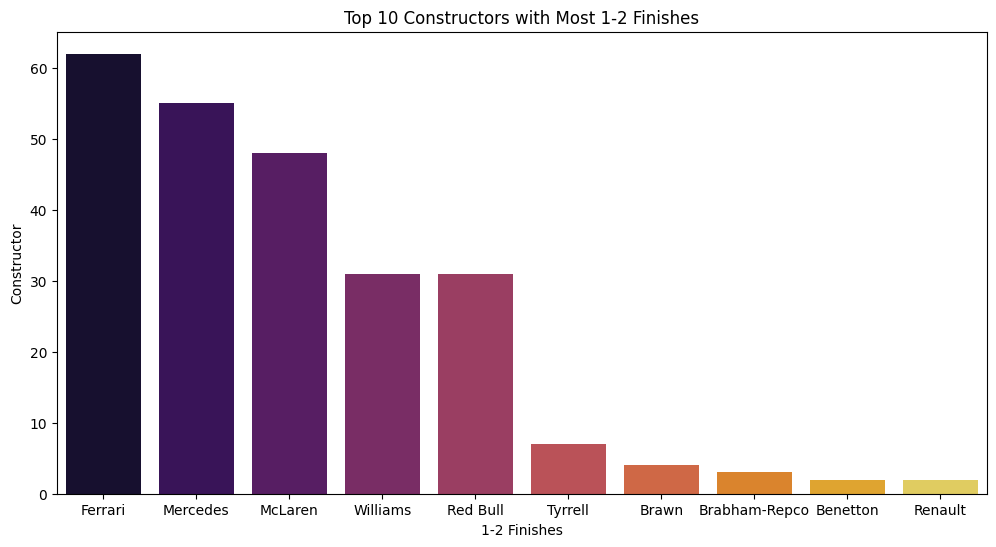

In [21]:
one_two_finishes = results.groupby(["raceId", "constructorId"])["positionOrder"].apply(lambda x: set(x) == {1, 2}).reset_index()
one_two_finishes = one_two_finishes[one_two_finishes["positionOrder"] == True]

one_two_count = one_two_finishes["constructorId"].value_counts().reset_index()
one_two_count.columns = ["constructorId", "one_two_finishes"]
one_two_count = one_two_count.merge(constructors, on="constructorId")

plt.figure(figsize=(12,6))
sns.barplot(data=one_two_count.head(10), y="one_two_finishes", x="name", palette="inferno")
plt.xlabel("1-2 Finishes")
plt.ylabel("Constructor")
plt.title("Top 10 Constructors with Most 1-2 Finishes")
plt.show()


/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/84657000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=race_outcomes.head(10), x="count", y="status", palette="rocket")


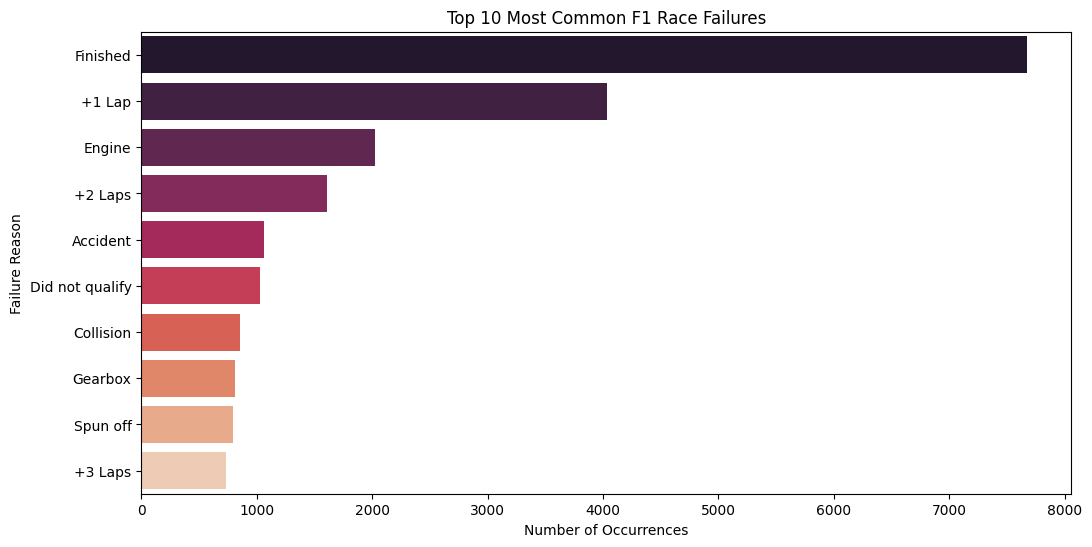

In [22]:
race_outcomes = results["statusId"].value_counts().reset_index()
race_outcomes.columns = ["statusId", "count"]
race_outcomes = race_outcomes.merge(status, on="statusId")[["status", "count"]]

plt.figure(figsize=(12,6))
sns.barplot(data=race_outcomes.head(10), x="count", y="status", palette="rocket")
plt.xlabel("Number of Occurrences")
plt.ylabel("Failure Reason")
plt.title("Top 10 Most Common F1 Race Failures")
plt.show()

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_25682/4176194123.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=winners_by_nationality.head(10), x="driverId", y="nationality", palette="coolwarm")


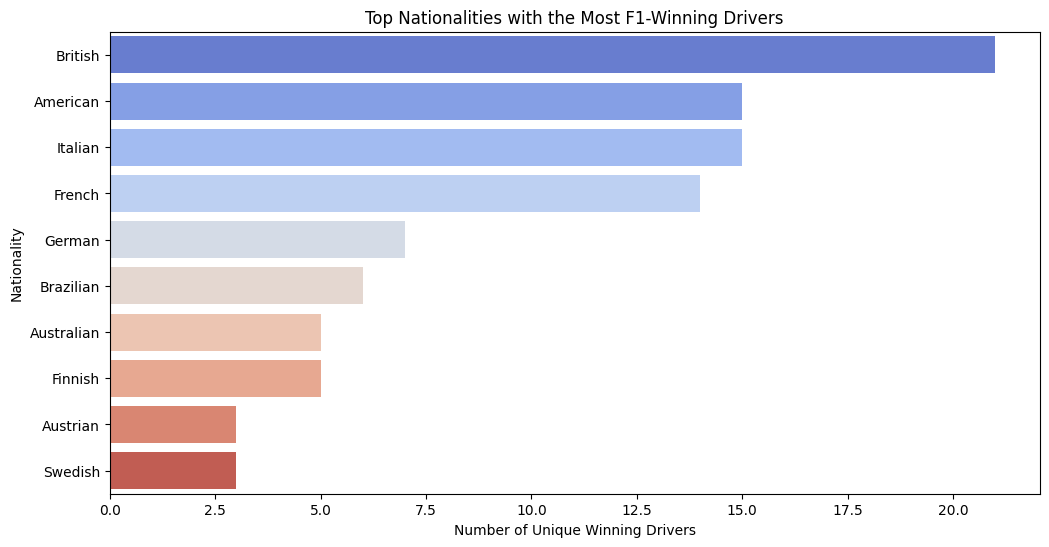

In [23]:
race_winners = results[results["positionOrder"] == 1].merge(drivers, on="driverId")
winners_by_nationality = race_winners.groupby("nationality")["driverId"].nunique().reset_index()
winners_by_nationality = winners_by_nationality.sort_values("driverId", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=winners_by_nationality.head(10), x="driverId", y="nationality", palette="coolwarm")
plt.xlabel("Number of Unique Winning Drivers")
plt.ylabel("Nationality")
plt.title("Top Nationalities with the Most F1-Winning Drivers")
plt.show()


In [24]:
dnf_results = results[results["statusId"] != 1] 
dnf_per_year = dnf_results.merge(races[["raceId", "year"]], on="raceId").groupby("year").size()

plt.figure(figsize=(12,6))
plt.plot(dnf_per_year.index, dnf_per_year.values, marker="o", linestyle="-", color="green")
plt.xlabel("Year")
plt.ylabel("Number of DNFs")
plt.title("DNF Trends in F1 Over the Years")
plt.show()


KeyError: 'year'

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_11012/2381534791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=era_performance, x="era", y="points", palette="magma")


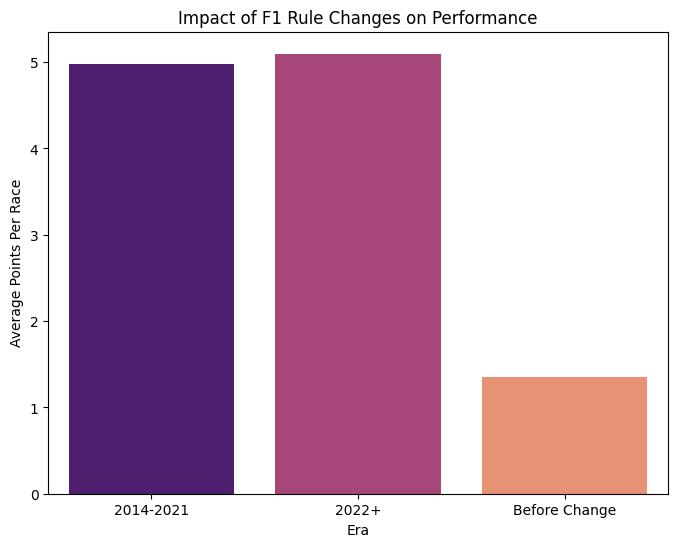

In [ ]:
major_changes = [2014, 2022]  
races["era"] = races["year"].apply(lambda x: "Before Change" if x < 2014 else ("2014-2021" if x < 2022 else "2022+"))

era_performance = results.merge(races[["raceId", "era"]], on="raceId").groupby("era")["points"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=era_performance, x="era", y="points", palette="magma")
plt.xlabel("Era")
plt.ylabel("Average Points Per Race")
plt.title("Impact of F1 Rule Changes on Performance")
plt.show()


In [ ]:
dnf_counts = results[results["statusId"] != 1].groupby("driverId").size().reset_index(name="dnfs")
race_starts = results.groupby("driverId").size().reset_index(name="race_starts")

dnf_rates = dnf_counts.merge(race_starts, on="driverId", how="right").fillna(0)
dnf_rates["dnf_percentage"] = (dnf_rates["dnfs"] / dnf_rates["race_starts"]) * 100

dnf_rates = dnf_rates.merge(drivers, on="driverId")[["surname", "race_starts", "dnfs", "dnf_percentage"]]
dnf_rates = dnf_rates.sort_values("dnf_percentage", ascending=False)
print(dnf_rates.tail(20))


        surname  race_starts  dnfs  dnf_percentage
820      Bottas          247  80.0       32.388664
2       Rosberg          206  61.0       29.611650
29   Schumacher          308  89.0       28.896104
842     Leclerc          149  41.0       27.516779
844      Norris          128  34.0       26.562500
655       Cross            4   1.0       25.000000
785     Fagioli            8   2.0       25.000000
19       Vettel          300  74.0       24.666667
513       Veith            5   1.0       20.000000
828  Verstappen          209  39.0       18.660287
855     Piastri           46   8.0       17.391304
0      Hamilton          356  44.0       12.359551
590       Amick            1   0.0        0.000000
801    Serafini            1   0.0        0.000000
849      Aitken            1   0.0        0.000000
673    Crockett            1   0.0        0.000000
556      Arnold            1   0.0        0.000000
858     Bearman            3   0.0        0.000000
726      Rigsby            1   

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_11012/1463356040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dnf_rates.tail(20), x="dnf_percentage", y="surname", palette="magma")


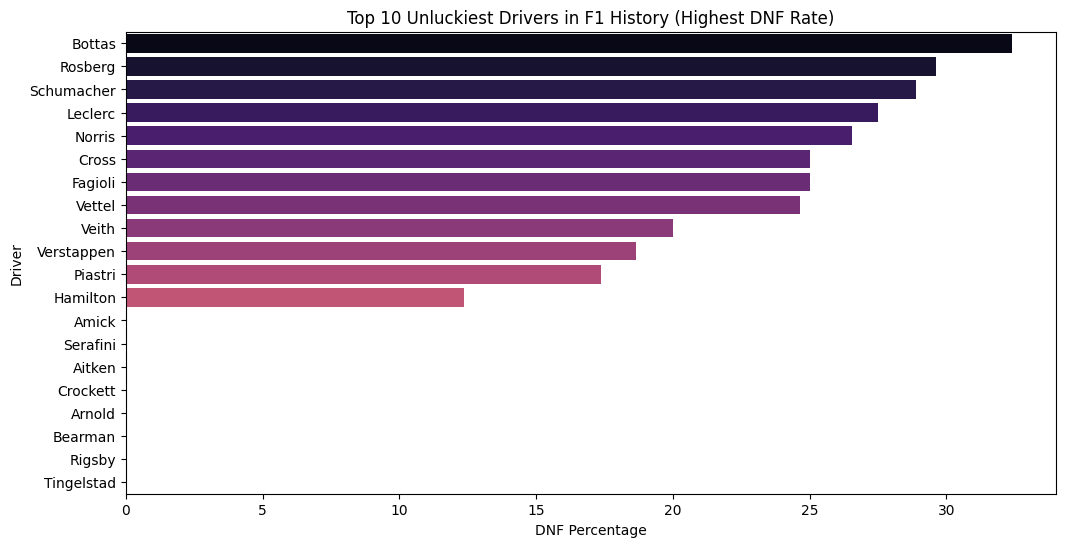

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=dnf_rates.tail(20), x="dnf_percentage", y="surname", palette="magma")
plt.xlabel("DNF Percentage")
plt.ylabel("Driver")
plt.title("Top 10 Unluckiest Drivers in F1 History (Highest DNF Rate)")
plt.show()

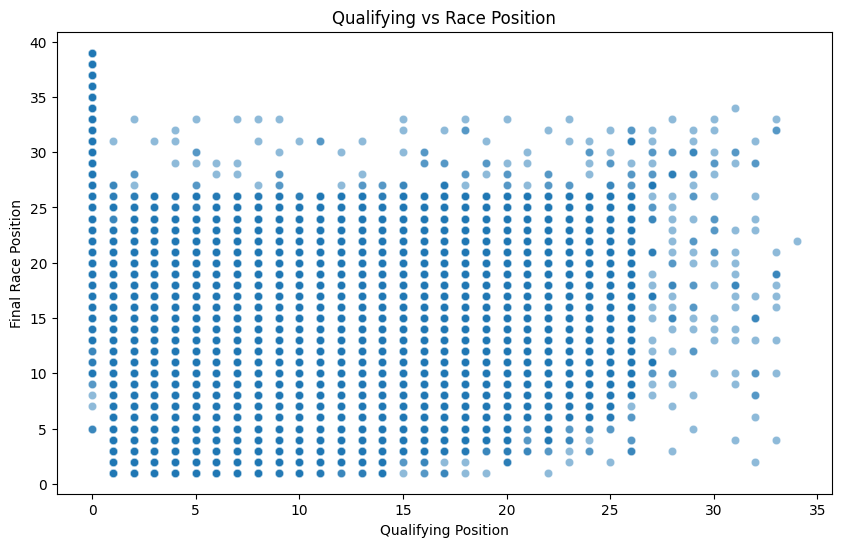

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=results, x="grid", y="positionOrder", alpha=0.5)
plt.xlabel("Qualifying Position")
plt.ylabel("Final Race Position")
plt.title("Qualifying vs Race Position")
plt.show()

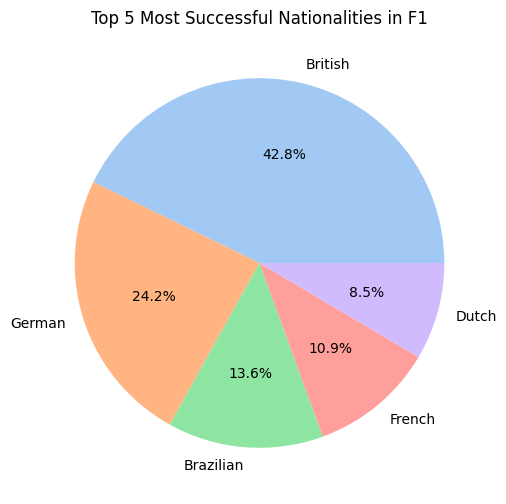

In [ ]:
winners = results[results["positionOrder"] == 1].merge(drivers, on="driverId")
nationality_counts = winners["nationality"].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Top 5 Most Successful Nationalities in F1")
plt.show()

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_11012/2621033396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_pit_stops, x="raceId", y="milliseconds", inner="quartile", palette="muted")


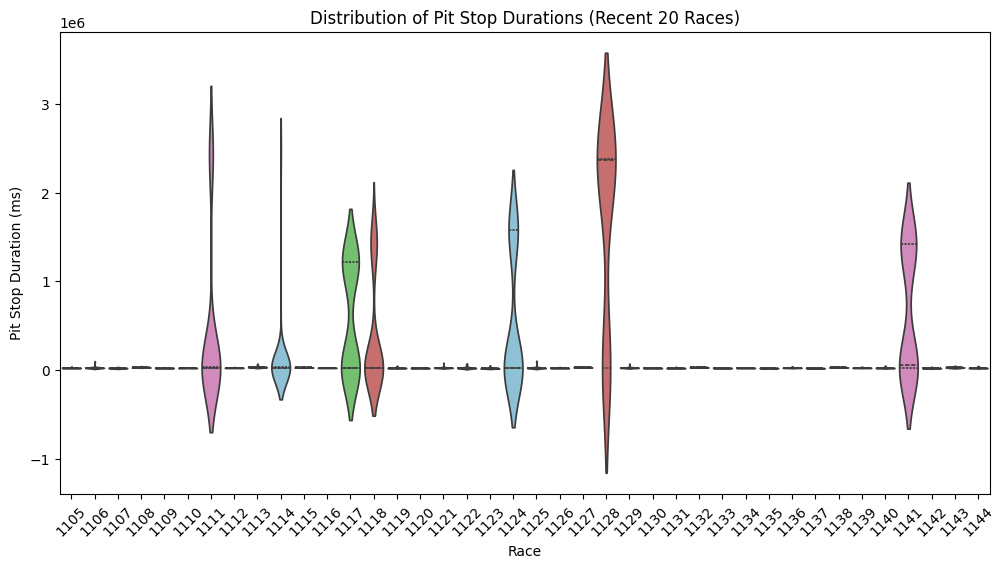

In [ ]:
latest_races = pit_stops["raceId"].unique()[-40:] 
filtered_pit_stops = pit_stops[pit_stops["raceId"].isin(latest_races)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_pit_stops, x="raceId", y="milliseconds", inner="quartile", palette="muted")
plt.xlabel("Race")
plt.ylabel("Pit Stop Duration (ms)")
plt.title("Distribution of Pit Stop Durations (Recent 20 Races)")
plt.xticks(rotation=45)
plt.show()



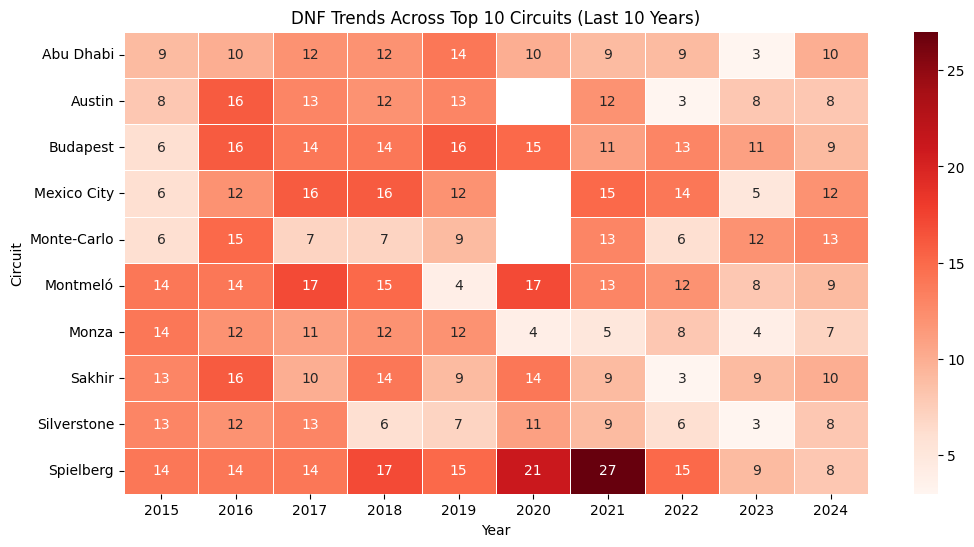

In [ ]:
races["date"] = pd.to_datetime(races["date"])

dnf_data = results[results["statusId"] != 1].merge(races[["raceId", "circuitId", "date"]], on="raceId")
dnf_data["year"] = dnf_data["date"].dt.year

recent_years = sorted(dnf_data["year"].unique())[-10]
dnf_data = dnf_data[dnf_data["year"] >= recent_years]

top_dnf_circuits = dnf_data["circuitId"].value_counts().head(10).index
dnf_data = dnf_data[dnf_data["circuitId"].isin(top_dnf_circuits)]

dnf_data = dnf_data.merge(circuits[["circuitId", "location"]], on="circuitId")
dnf_counts = dnf_data.groupby(["location", "year"]).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(dnf_counts, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Year")
plt.ylabel("Circuit")
plt.title("DNF Trends Across Top 10 Circuits (Last 10 Years)")
plt.show()